In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn import metrics


data = pd.read_csv("SpotifyFeatures.csv")

data = data.loc[data.loc[:, 'popularity'] >= 60, :]

data['mode'] = pd.factorize(data['mode'])[0]
data.key = pd.factorize(data.key)[0]

data.drop(columns=['genre', 'artist_name', 'track_name', 'track_id', 'time_signature'], inplace=True)

print(data)

        popularity  acousticness  danceability  duration_ms  energy  \
135             65       0.08300         0.724       246333   0.689   
136             63       0.32300         0.685       186467   0.610   
137             62       0.06750         0.762       199520   0.520   
138             61       0.36000         0.563       240597   0.366   
139             68       0.59600         0.653       213947   0.621   
...            ...           ...           ...          ...     ...   
228206          60       0.77000         0.672       242200   0.424   
228385          61       0.00362         0.764       207133   0.816   
228607          64       0.45300         0.409       205584   0.379   
230312          60       0.27300         0.833       318800   0.661   
230817          60       0.00862         0.567       163840   0.753   

        instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
135             0.000000    0    0.3040    -5.922     0       0.13

5


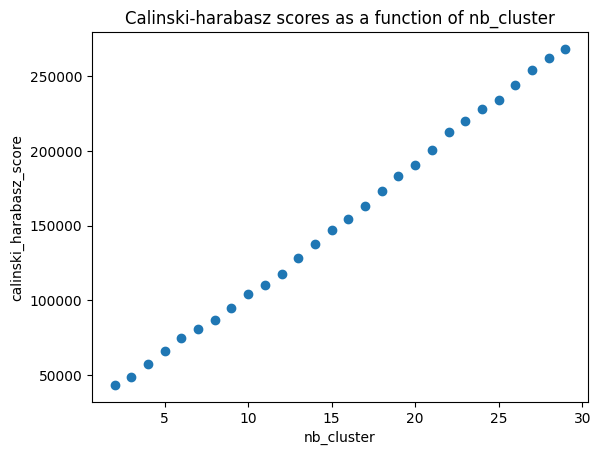

In [24]:
nbs_of_clusters = range(1, 100)
inertias = []
calinski_harabasz_scores = dict()

"""
add lines here
"""
for nb_cluster in nbs_of_clusters:
    kmeans = KMeans(n_clusters=nb_cluster, init="k-means++", n_init=10, random_state=42).fit(data)
    inertias.append(kmeans.inertia_)
    if (nb_cluster <= 1):
        continue
    labels = kmeans.labels_
    calinski_harabasz_scores[nb_cluster] = metrics.calinski_harabasz_score(data, labels)

kneedle = KneeLocator(nbs_of_clusters, inertias, S=1, curve="convex", direction="decreasing")
print(kneedle.knee)
kneedle.plot_knee()

In [ ]:
plt.plot(nbs_of_clusters[1:], calinski_harabasz_scores.values(), "o")
plt.title("Calinski-harabasz scores as a function of nb_cluster")
plt.xlabel("nb_cluster")
plt.ylabel("calinski_harabasz_score")
plt.show()
plt.close()

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 0 0 ... 0 3 4]


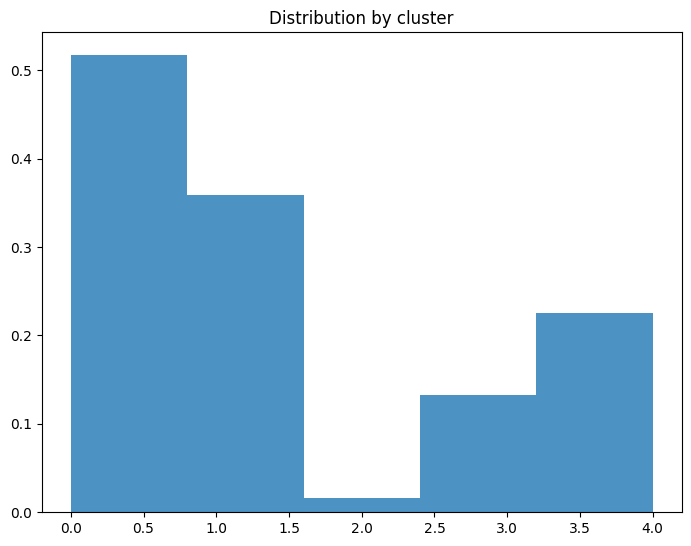

In [19]:
num_clust = kneedle.knee

kmeans = KMeans(n_clusters = num_clust, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

print(y_kmeans)

# data.loc[:, 'cluster'] = y_kmeans

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.hist(
    y_kmeans,
    bins=num_clust,
    density=True,
    alpha=0.8
)

plt.title('Distribution by cluster')
plt.show()